<a href="https://colab.research.google.com/github/its-ShivamK/HeartDiseasePridiction/blob/main/UnderWaterImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


> **Random Forest** - It is like Binary Decision Tree ....Feature are extracted using CNN ,using that features the prediction is made and average of the predictions are taken as the final prediction

> **K-Nearest Neighbour** - Data are drawn in x and y -axis ,the unknown point(the point you want to predict) is taken and the distance of all the nearest neighbouring points is calculated and the nearest group is predicted

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.models import Sequential             #the Sequential module which is used for initializing our model.
from keras.layers import Convolution2D as c2d   #we’ll use for the first step of making the CNN that is the convolution step in which we add convolutional layers.
from keras.layers import MaxPooling2D           #the pooling step that will add our pooling layers .
from keras.layers import Flatten                #flattening
from keras.layers import Dense                  #this is the package we use to add the fully connected layer.
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from keras import datasets
from sklearn.model_selection import train_test_split
from tqdm import tqdm #progresss bar
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
import os
import shutil
import pandas as pd

# ***Image processing and Data spliting***

In [ ]:
# (X_train, Y_train), (X_test, Y_test)=load cifar

In [ ]:
# def train_test_split():
#     print("########### Train Test Val Script started ###########")
#     data_csv = pd.read_csv("/content/drive/MyDrive/New Fish/class_id.csv") ##Use if you have classes saved in any .csv file

#     root_dir = '/content/drive/MyDrive/Splitted Fish'
#     classes_dir = ['fish_01', 'fish_02','fish_03','fish_04','fish_05','fish_06','fish_07','fish_08','fish_09','fish_10','fish_11','fish_12','fish_13','fish_14','fish_15','fish_16','fish_17','fish_18','fish_19','fish_20','fish_21','fish_22','fish_23']

#     #for name in data_csv['file_name'].unique()[:10]:
#     #     classes_dir.append(name)

#     processed_dir = '/content/drive/MyDrive/New Fish'

#     val_ratio = 0.20
#     test_ratio = 0.20
#     os.makedirs(root_dir + '/train//')
#     os.makedirs(root_dir + '/val//')
#     os.makedirs(root_dir + '/test//')
#     for cls in classes_dir:
#         # Creating partitions of the data after shuffeling
#         print("$$$$$$$ Class Name " + cls + " $$$$$$$")
#         src = processed_dir +"/" + cls  # Folder to copy images from

#         allFileNames = os.listdir(src)
#         print(allFileNames)
#         np.random.shuffle(allFileNames)
#         train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
#                                                                   [int(len(allFileNames) * (1 - (val_ratio + test_ratio))),
#                                                                    int(len(allFileNames) * (1 - val_ratio)),
#                                                                    ])
#         # filne=[]
#         # filena=[filne.append(name[5:-4])for name in train_FileNames]
#         train_FileNames = [src + '//' + name for name in train_FileNames.tolist()]
#         val_FileNames = [src + '//' + name for name in val_FileNames.tolist()]
#         test_FileNames = [src + '//' + name for name in test_FileNames.tolist()]
#         print('Total images: '+ str(len(allFileNames)))
#         print('Training: '+ str(len(train_FileNames)))
#         print('Validation: '+  str(len(val_FileNames)))
#         print('Testing: '+ str(len(test_FileNames)))

#         # # Creating Train / Val / Test folders (One time use)


#         # Copy-pasting images
#         for name in train_FileNames:
#             shutil.copy(name, root_dir + '/train/')# + cls)

#         for name in val_FileNames:
#             shutil.copy(name, root_dir + '/val/')# + cls)

#         for name in test_FileNames:
#             shutil.copy(name, root_dir + '/test/')# + cls)

#     print("########### Train Test Val Script Ended ###########")

# train_test_split()

In [ ]:
# src='/content/drive/MyDrive/Splitted Fish/val'
# allFileNames = os.listdir(src)
# print('Total images: '+ str(len(allFileNames)))


In [ ]:
processed_dir = '/content/drive/MyDrive/Fish New Sp Dataset/train'
src = processed_dir# +"/" + cls  # Folder to copy images from
data_csv = pd.read_csv("/content/drive/MyDrive/Fish Dataset/class_id.csv") ##Use if you have classes saved in any .csv file

allFileNames = os.listdir(src)
filne=[]
ctr=-1
classes_dir = ['file_name', 'cluster_id']
import csv
with open('/content/sample_data/train.csv','w', encoding='UTF8', newline='') as f1:
    #writer.writerow(classes_dir)
    writer = csv.DictWriter(f1, fieldnames=classes_dir)
    writer.writeheader()
    # print(data_csv['file_name'])
    # writer=csv.writer(f1, delimiter='\t',lineterminator='\n',)
    filena=[filne.append(name[6:-4])for name in allFileNames]
    print(len(filne))
    for i in data_csv['file_name']:
      ctr+=1
      if i in filne :
        my_dict = {"file_name":'',"cluster_id":''};
        my_dict["file_name"]=i
        my_dict["cluster_id"]=data_csv['cluster_id'][ctr]
        print(my_dict)
        writer.writerow(my_dict)

Streaming output truncated to the last 5000 lines.
{'file_name': '03910396343_18925', 'cluster_id': 1}
{'file_name': '04079006695_18926', 'cluster_id': 1}
{'file_name': '03796736085_18927', 'cluster_id': 1}
{'file_name': '03958406470_18929', 'cluster_id': 1}
{'file_name': '04099396726_18932', 'cluster_id': 1}
{'file_name': '03416985270_18935', 'cluster_id': 1}
{'file_name': '03426275286_18938', 'cluster_id': 1}
{'file_name': '03379675208_18939', 'cluster_id': 1}
{'file_name': '03425655286_18940', 'cluster_id': 1}
{'file_name': '03425605286_18941', 'cluster_id': 1}
{'file_name': '03738725907_18942', 'cluster_id': 1}
{'file_name': '03425605286_18943', 'cluster_id': 1}
{'file_name': '03387605222_18944', 'cluster_id': 1}
{'file_name': '03425655286_18945', 'cluster_id': 1}
{'file_name': '03715605857_18946', 'cluster_id': 1}
{'file_name': '04465247252_18947', 'cluster_id': 1}
{'file_name': '04260296960_18948', 'cluster_id': 1}
{'file_name': '04220916902_18950', 'cluster_id': 1}
{'file_name':

In [ ]:
processed_dir = '/content/drive/MyDrive/Fish New Sp Dataset/test'
src = processed_dir# +"/" + cls  # Folder to copy images from
data_csv = pd.read_csv("/content/drive/MyDrive/Fish Dataset/class_id.csv") ##Use if you have classes saved in any .csv file

allFileNames = os.listdir(src)
filne=[]
ctr=-1
classes_dir = ['file_name', 'cluster_id']
import csv
with open('/content/sample_data/test.csv','w', encoding='UTF8', newline='') as f1:
    #writer.writerow(classes_dir)
    writer = csv.DictWriter(f1, fieldnames=classes_dir)
    writer.writeheader()
    # print(data_csv['file_name'])
    # writer=csv.writer(f1, delimiter='\t',lineterminator='\n',)
    filena=[filne.append(name[6:-4])for name in allFileNames]
    print(len(filne))
    for i in data_csv['file_name']:
      ctr+=1
      if i in filne :
        my_dict = {"file_name":'',"cluster_id":''};
        my_dict["file_name"]=i
        my_dict["cluster_id"]=data_csv['cluster_id'][ctr]
        print(my_dict)
        writer.writerow(my_dict)

Streaming output truncated to the last 5000 lines.
{'file_name': '00022190001_02091', 'cluster_id': 1}
{'file_name': '00022220001_02112', 'cluster_id': 1}
{'file_name': '00022220001_02120', 'cluster_id': 1}
{'file_name': '00022210001_02125', 'cluster_id': 1}
{'file_name': '00022210001_02126', 'cluster_id': 1}
{'file_name': '00022210001_02127', 'cluster_id': 1}
{'file_name': '00022690001_02139', 'cluster_id': 1}
{'file_name': '00022850001_02141', 'cluster_id': 1}
{'file_name': '00022850001_02142', 'cluster_id': 1}
{'file_name': '00022850001_02153', 'cluster_id': 1}
{'file_name': '00022850001_02157', 'cluster_id': 1}
{'file_name': '00022850001_02159', 'cluster_id': 1}
{'file_name': '00023080001_02176', 'cluster_id': 1}
{'file_name': '00023130001_02179', 'cluster_id': 1}
{'file_name': '00023170001_02191', 'cluster_id': 1}
{'file_name': '00023180001_02196', 'cluster_id': 1}
{'file_name': '00023180001_02198', 'cluster_id': 1}
{'file_name': '00023190001_02203', 'cluster_id': 13}
{'file_name'

In [ ]:
import pandas as pd
data = '/content/sample_data/train.csv'
train = pd.read_csv(data)
data2 = '/content/sample_data/test.csv'
test=pd.read_csv(data2)

In [ ]:
test.shape

(5440, 2)

In [ ]:
train.shape

(16268, 2)

In [ ]:
chang=int(train.shape[0]/2)
print(chang)

8134


In [ ]:
train_image=[]
for i in tqdm(range(chang)):
      img = image.load_img('/content/drive/MyDrive/Fish New Sp Dataset/train/fish_0'+train['file_name'][i]+'.png',target_size=(400,400,3))
      img = image.img_to_array(img)
      img = img/255
      train_image.append(img)


100%|██████████| 8134/8134 [37:46<00:00,  3.59it/s]


In [ ]:
test_image=[]
chan=int(test.shape[0]/3)
for i in tqdm(range(chan)):
  img = image.load_img('/content/drive/MyDrive/Fish New Sp Dataset/test/fish_0'+test['file_name'][i]+'.png',target_size=(400,400,3))
  img = image.img_to_array(img)
  img = img/255
  test_image.append(img)


100%|██████████| 1813/1813 [08:12<00:00,  3.68it/s]


In [ ]:
X_test=np.array(test_image)

In [ ]:
X_test.shape

In [ ]:
X_train=np.array(train_image)

In [ ]:
X_train.shape

(8134, 400, 400, 3)

In [ ]:
plt.imshow(X_train[6])

In [ ]:
Y_train=np.array(train.drop(['file_name'],axis=1))
Y_train=Y_train[:8134]
# letchan=int(y.shape[0]/7)
# y=(letchan,y.shape[1])
Y_train.shape

(8134, 1)

In [ ]:
Y_test=np.array(train.drop(['file_name'],axis=1))
Y_test=Y_test[:1813]
# letchan=int(y.shape[0]/7)
# y=(letchan,y.shape[1])
Y_test.shape

(1813, 1)

In [ ]:
# X_train,X_test,Y_train,Y_test=train_test_split(X,y,random_state=40,test_size=0.1)

In [ ]:
print(X_train.shape)

(820, 400, 400, 3)


In [ ]:
print(X_train.shape,'\n',X_test.shape,'\n',Y_train.shape,'\n',Y_test.shape)


(8134, 400, 400, 3) 
 (1813, 400, 400, 3) 
 (8134, 1) 
 (1813, 1)


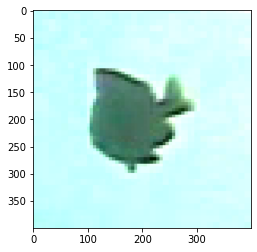

In [ ]:
plt.imshow(X_test[30])

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
# Y_test=Y_test.reshape(-1,)

# Y_test[:5]
# Y_test.shape
Y_test.shape

(685, 1)

# ***CNN***

In [ ]:
cnn = Sequential([
    c2d(filters=32,kernel_size=(3,3),input_shape=(400,400,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    #adding one more convolutional layer
    c2d(filters=64 ,kernel_size=(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2))])

In [ ]:
#flatten
cnn.add(Flatten())

Softmax -(0.45)/(0.45+0.67)=0.40 ,it normalize the data

In [ ]:
#Full connection
cnn.add(Dense(128, activation = 'relu'))    # hidden layer
cnn.add(Dense(64, activation = 'relu'))
cnn.add(Dense(32, activation = 'relu'))
cnn.add(Dense(23, activation = 'sigmoid'))   # output Layer

sparse_categorical_crossentropy - when y=8 or any specific value
categorical_crossentropy - when y=[0 0 0 0 0 0 0 1 0] i.e one vector

In [ ]:
#Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
print(X_train.shape,'\n',X_test.shape,'\n',Y_train.shape,'\n',Y_test.shape)


(8134, 400, 400, 3) 
 (1813, 400, 400, 3) 
 (8134, 1) 
 (1813, 1)


In [ ]:
cnn.fit(X_train,Y_train)

InternalError: ignored

In [ ]:
cnn.evaluate(X_test,Y_test)

ValueError: ignored

In [ ]:
# classes =np.array(train.columns[1:])
# classes

array(['cluster_id'], dtype=object)

In [ ]:
proba=cnn.predict(X_test)
proba

In [ ]:
proba.shape

**For Multi-class classification**

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np

y_pred=cnn.predict(X_test)
y_pred_classes =[np.argmax(element) for element in y_pred ]
print("Classificaation Report: \n\n", classification_report(y_pred_classes,Y_test))

57/57 [==============================] - 1s 24ms/step
Classificaation Report: 

               precision    recall  f1-score   support

           0       0.00      0.00      0.00    1813.0
           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       0.0
           6       0.00      0.00      0.00       0.0
           7       0.00      0.00      0.00       0.0
           8       0.00      0.00      0.00       0.0
           9       0.00      0.00      0.00       0.0
          12       0.00      0.00      0.00       0.0
          13       0.00      0.00      0.00       0.0
          14       0.00      0.00      0.00       0.0
          15       0.00      0.00      0.00       0.0
          17       0.00      0.00      0.00       0.0
          18       0.00      0.00      0.00       0.0
          21       0.00      0.00      0.00       0.0


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

**For Multi-label classification**

Because of less acc we have to manually encoded it

In [ ]:
#Converting to one hot encoded
#***change this when treated with big dataset***

y_pred_chan=[]
for i in proba:
  col=[]
  for j in i:
    if(j>0.2):
      col.append(1)
    else:
      col.append(0)
  y_pred_chan.append(col)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(Y_test, y_pred_chan, target_names=classes))

In [ ]:
Acc_cnn=metrics.accuracy_score(y_pred_chan,Y_test)
print(Acc_cnn)

In [ ]:
cnn.summary()



# ***CNN with SVM classifier***

In [ ]:
from keras.regularizers import l2

In [ ]:
cnn_svm = Sequential([
    c2d(filters=32,kernel_size=(3,3),input_shape=(400,400,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    #adding one more convolutional layer
    c2d(filters=64 ,kernel_size=(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2))])

In [ ]:
#flatten
cnn_svm.add(Flatten())

In [ ]:
#Full connection
cnn_svm.add(Dense(128, activation = 'relu'))    # hidden layer
cnn_svm.add(Dense(64, activation = 'relu'))
cnn_svm.add(Dense(32, activation = 'relu'))
cnn_svm.add(Dense(9,kernel_regularizer=l2(0.01),activation='softmax'))   # adding this dense layer in output Layer will add svm classifier

In [ ]:
#Compiling the CNN
cnn_svm.compile(optimizer='adam',loss='squared_hinge',metrics=['accuracy']) #and adding loss as squared hinge in multiclassification model and loss=hinge in binary classification

In [ ]:
cnn_svm.fit(X_train,Y_train,epochs=1)

In [ ]:
cnn_svm.evaluate(X_test,Y_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np

y_pred=cnn_svm.predict(X_test)
y_predict_classes =[np.argmax(element) for element in y_pred ]

print("Classificaation Report: \n\n", classification_report(y_predict_classes,Y_test))

Because of less acc we have to manually encoded it

In [ ]:
# #Converting to one hot encoded
# #***change this when treated with big dataset***
# y_pred=cnn_svm.predict(X_test)
# y_pred_chan=[]
# for i in y_pred:
#   col=[]
#   for j in i:
#     if(j>0.2):
#       col.append(1)
#     else:
#       col.append(0)
#   y_pred_chan.append(col)

In [ ]:
# print(classification_report(Y_test, y_pred_chan, target_names=classes))

In [ ]:
# Acc_svm=metrics.accuracy_score(y_pred_chan,Y_test)
# print(Acc_svm)

In [ ]:
cnn_svm.summary()

# ***CNN with Random Forest***

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(Y_test)
le.fit(Y_train)


In [ ]:
Fe = Sequential([
    c2d(filters=32,kernel_size=(3,3),input_shape=(400,400,3),activation='sigmoid'),
    MaxPooling2D(pool_size=(2,2)),
    #adding one more convolutional layer
    c2d(filters=64 ,kernel_size=(3,3),activation='sigmoid'),
    MaxPooling2D(pool_size=(2,2))])
Fe.add(Flatten())

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

**For multiclass classification **

In [ ]:
 X_for_RF=Fe.predict(X_train)

In [ ]:
 RF_model=RandomForestClassifier(n_estimators=60)



In [ ]:
 RF_model.fit(X_for_RF,Y_train.ravel())

In [ ]:
X_test_feature=Fe.predict(X_test)

In [ ]:
 prediction_Rf=RF_model.predict(X_test_feature)
 prediction_Rf=le.inverse_transform(prediction_Rf)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np

print("Classificaation Report: \n\n", classification_report(Y_test,predictions_2))

**For multilabel classification**

In [ ]:
Fe.summary()

In [ ]:
from keras.models import Model
new_model=Model(inputs=Fe.input,outputs=Fe.get_layer('max_pooling2d_3').output)
#Let's obtain the Input Representations
train_x=new_model.predict(X_train)
X_test=X_test.reshape(X_test.shape[0],400,400,3)
test_x=new_model.predict(X_test)
#We are now going to have a single row for each example
train_x=train_x.reshape(X_train.shape[0],98*98*64)
test_x=test_x.reshape(X_test.shape[0],98*98*64)

In [ ]:
#pip install scikit-multilearn  --- If not installed

In [ ]:
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(RandomForestClassifier())

In [ ]:
classifier.fit(train_x,Y_train)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
predictions_2 = classifier.predict(test_x)
# accuracy
Acc_RF=accuracy_score(Y_test,predictions_2)
print(Acc_RF)

# ***CNN with K-Nearest Neighbour***

In [ ]:
#Creating Features
cnn_knn= Sequential([
    c2d(filters=32,kernel_size=(3,3),input_shape=(400,400,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    #adding one more convolutional layer
    c2d(filters=64 ,kernel_size=(3,3),activation='sigmoid'),
    MaxPooling2D(pool_size=(2,2))])
cnn_knn.add(Flatten())

In [ ]:
cnn_knn.summary()

In [ ]:
from keras.models import Model
new_model=Model(inputs=cnn_knn.input,outputs=cnn_knn.get_layer('max_pooling2d_5').output)


In [ ]:
train_x=new_model.predict(X_train)
print(train.shape)
print(train_x)

In [ ]:
print(train_x[0][0].shape)

In [ ]:
#Let's obtain the Input Representations
X_test=X_test.reshape(X_test.shape[0],400,400,3)
test_x=new_model.predict(X_test)
print(X_test.shape)
print(X_test)

In [ ]:
#We are now going to have a single row for each example
test_x=test_x.reshape(X_test.shape[0],98*98*64)
train_x=train_x.reshape(X_train.shape[0],98*98*64)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()
knc.fit(train_x,Y_train)
knc.score(train_x,Y_train)

In [ ]:
knn_predict=knc.predict(test_x)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np

print("Classificaation Report: \n\n", classification_report(knn_predict,Y_test))

In [ ]:
Acc_knn=metrics.accuracy_score(knn_predict,Y_test)
print("Accuracy=" ,Acc_knn)

# ***CNN with Logistic Regression***

In [ ]:
#Creating Features
cnn_Lr= Sequential([
    c2d(filters=32,kernel_size=(3,3),input_shape=(400,400,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    #adding one more convolutional layer
    c2d(filters=64 ,kernel_size=(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2))])
cnn_Lr.add(Flatten())

In [ ]:
cnn_Lr.summary()

In [ ]:
from keras.models import Model
new_model=Model(inputs=cnn_Lr.input,outputs=cnn_Lr.get_layer('max_pooling2d_7').output)
#Let's obtain the Input Representations
train_x=new_model.predict(X_train)
X_test=X_test.reshape(X_test.shape[0],400,400,3)
test_x=new_model.predict(X_test)
#We are now going to have a single row for each example
train_x=train_x.reshape(X_train.shape[0],98*98*64)
test_x=test_x.reshape(X_test.shape[0],98*98*64)

**For multiclass classification **

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
from sklearn.linear_model import LogisticRegression
lc=LogisticRegression()
lc.fit(train_x,Y_train)
lc.score(train_x,Y_train)

In [ ]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())

In [ ]:
pipe.fit(train_x,Y_train.ravel())
pipe.score(train_x,Y_train.ravel())

In [ ]:
y_pred = pipe.predict(test_x)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np

print("Classificaation Report: \n\n", classification_report(Y_test,predictions_1))

**For multilabel classification**

In [ ]:
#pip install scikit-multilearn  --- If not installed

In [ ]:
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.linear_model import LogisticRegression
# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(LogisticRegression())

In [ ]:
classifier.fit(train_x,Y_train)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
predictions_1 = classifier.predict(test_x)
# accuracy
Acc_Lr=accuracy_score(Y_test,predictions_1)
print(Acc_Lr)

# ***CNN with Naive Bayes***

In [ ]:
#Creating Features
cnn_nb= Sequential([
    c2d(filters=32,kernel_size=(3,3),input_shape=(400,400,3),activation='sigmoid'),
    MaxPooling2D(pool_size=(2,2)),
    #adding one more convolutional layer
    c2d(filters=64 ,kernel_size=(3,3),activation='sigmoid'),
    MaxPooling2D(pool_size=(2,2))])
cnn_nb.add(Flatten())

In [ ]:
cnn_nb.summary()

In [ ]:
from keras.models import Model
new_model=Model(inputs=cnn_nb.input,outputs=cnn_nb.get_layer('max_pooling2d_9').output)
#Let's obtain the Input Representations
train_x=new_model.predict(X_train)
X_test=X_test.reshape(X_test.shape[0],400,400,3)
test_x=new_model.predict(X_test)
#We are now going to have a single row for each example
train_x=train_x.reshape(X_train.shape[0],98*98*64)
test_x=test_x.reshape(X_test.shape[0],98*98*64)

**For multiclass classification**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [ ]:
gnb.fit(train_x,Y_train)

In [ ]:
y_prd = gnb.predict(test_x)

In [ ]:
gnb.score(train_x,Y_train.ravel())

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np

print("Classificaation Report: \n\n", classification_report(predictions,Y_test))

**For multilabel classification**

In [ ]:
#pip install scikit-multilearn  --- If not installed

In [ ]:
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())

In [ ]:
classifier.fit(train_x,Y_train)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
predictions = classifier.predict(test_x)
# accuracy
Acc_nb=accuracy_score(Y_test,predictions)
print(Acc_nb)

# ***Accuracy Details***

In [ ]:
print("ACCURACY WITH CNN         --",metrics.accuracy_score(y_pred_classes,Y_test))
print("ACCURACY WITH CNN AND SVM --",metrics.accuracy_score(y_predict_classes,Y_test))
print("ACCURACY WITH CNN AND RF  --",metrics.accuracy_score(prediction_Rf,Y_test))
print("ACCURACY WITH CNN AND KNN --",metrics.accuracy_score(knn_predict,Y_test))
print("ACCURACY WITH CNN AND LR  --",metrics.accuracy_score(y_pred,Y_test))
print("ACCURACY WITH CNN AND NB  --",metrics.accuracy_score(y_prd,Y_test))

In [ ]:
print("ACCURACY WITH CNN         --",Acc_cnn)
print("ACCURACY WITH CNN AND SVM --",Acc_svm)
print("ACCURACY WITH CNN AND RF  --",Acc_RF)
print("ACCURACY WITH CNN AND KNN --",Acc_knn)
print("ACCURACY WITH CNN AND LR  --",Acc_Lr)
print("ACCURACY WITH CNN AND NB  --",Acc_nb)

# **SOME IMP LINKS**
1. BinaryRelevance

> https://towardsdatascience.com/journey-to-the-center-of-multi-label-classification-384c40229bff    


